<a href="https://colab.research.google.com/github/digosb/data_sciencia_machine_learn_redes_neurais/blob/main/introdu%C3%A7%C3%A3o_ao_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lendo arquivo excel

In [ ]:
# importando a biblioteca pandas.
import pandas as pd

# lendo arquivo no excel formato xlsx e CSV
notas = pd.read_csv("ratings.csv")

# Renomendo as colunas
notas.columns = ["usuarioID", "filmesID", "nota", "momento"]

# Verificando as 5 primeiras linhas da planilha
notas.head()

,usuarioID,filmesID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# mostra o valor unico das notas ou seja mostra uma vez cada número.
notas['nota'].unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
# mostra as notas em series e a quantidade que cada nota apareceu.
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
 # Calculando a media da notas
 print("Media", notas.nota.mean())

Media 3.501556983616962


In [ ]:
 # Calculando a Mediana da notas
 print("Mediana", notas.nota.median())

Mediana 3.5


In [ ]:
# descrevendo os elementos de notas 
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

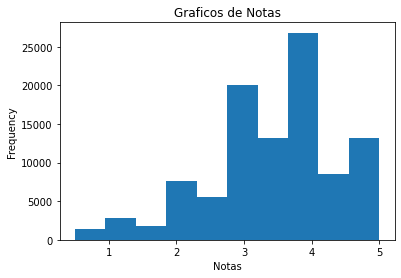

In [ ]:
# importando e mataplotlinb

import matplotlib.pyplot as plt

# Colando Titulo no grafico
plt.title('Graficos de Notas')

# Nomeando o eixo X e Y
plt.xlabel('Notas')
plt.ylabel('Quantidade')

# Usando grafico de histograma
notas.nota.plot(kind='hist')

# Escondendo cabeçaclho do matplot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


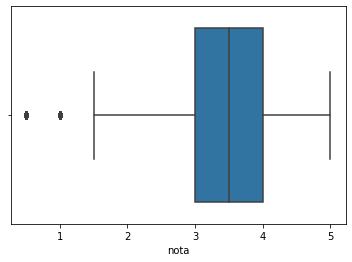

In [ ]:
# impportando o grafico seaborn 
import seaborn as sns
sns.boxplot(notas.nota)

In [ ]:
# Obtendo media por filmes
notas.query("filmesID==1").nota.mean()

3.9209302325581397

In [ ]:
# Obtendo media por filme exemplo 2
notas.query("filmesID==2").nota.mean()

3.4318181818181817

In [ ]:
# Obtendo a media por filme da tabela interira exemplo 3
media_por_filme = notas.groupby("filmesID").mean().nota
media_por_filme.head()


filmesID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.columns=['filmeID', 'titulo', 'genero']
filmes.head()


,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioID,filmesID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Mostrando notas apenas filmes que possui o ID = 1
notas.query("filmesID==1")

,usuarioID,filmesID,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


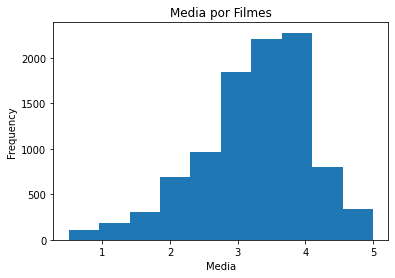

In [ ]:
# grafico da media por filmes 
media_por_filme.plot(kind='hist')
plt.title("Media por Filmes")
plt.xlabel("Media")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


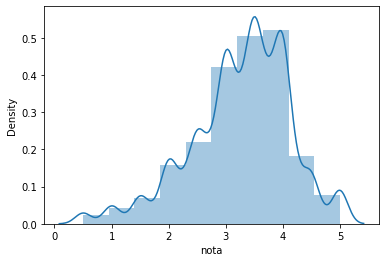

In [ ]:
# Usando grafico do Seaborn
sns.distplot(media_por_filme, bins=10)


(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

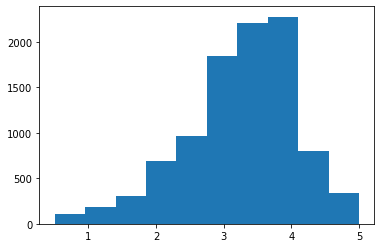

In [ ]:
# outra maneira de usar grafico pyplot

plt.hist(media_por_filme)

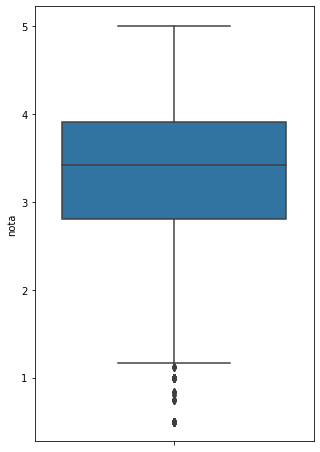

In [ ]:
# Usando boxplot e configurando seu tamanho altura e largura
plt.figure(figsize=(5,8))
sns.boxplot(y=media_por_filme)

In [ ]:
#notas.nota.value_counts().index
#notas.nota.value_counts().values
#notas.nota.value_counts().to_frame()
# Criando data frame
notas2 = notas.nota.value_counts().to_frame().reset_index()
notas2.columns = ["nota", "total"]
notas2.head()


,nota,total
0,4.0,26818
1,3.0,20047
2,5.0,13211
3,3.5,13136
4,4.5,8551


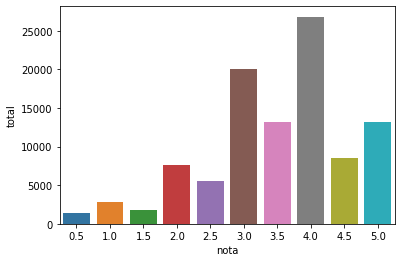

In [ ]:
sns.barplot(x="nota", y="total", data = notas2)